In [1]:
# Importing some useful libraries

import pyforest; import bamboolib as bam

In [2]:
# Loading the data

df = pd.read_csv("health_insurance.csv")

<IPython.core.display.Javascript object>

In [3]:
df

,age,gender,bmi,bp,children,region,smoker,insurance_policy
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [5]:
# Printing correlation matrix (between numerical variables)

corr_matrix = df.corr()
corr_matrix = corr_matrix.reset_index()
corr_matrix

,index,age,bmi,bp,children,insurance_policy
0,age,1.000000,0.110526,0.036207,0.045586,0.291133
1,bmi,0.110526,1.000000,0.033802,0.013363,0.174308
2,bp,0.036207,0.033802,1.000000,-0.041621,0.043479
3,children,0.045586,0.013363,-0.041621,1.000000,0.077097
4,insurance_policy,0.291133,0.174308,0.043479,0.077097,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

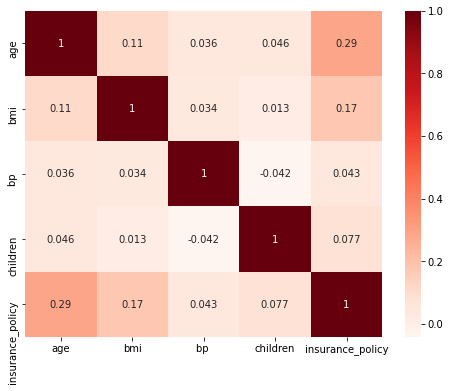

In [6]:
# Visualizing...

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="Reds", annot=True)

So, we see the highest correlations between insurance policy and age respectively bmi.  
In the next step, we define insurance policy as our target variable and print some scatter plots.

In [7]:
# Creating dataframe with numerical features, defining insurance_policy as target variable.

X = df.iloc[:,:-1]
X_numeric = X.select_dtypes(['number'])
y = df.insurance_policy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

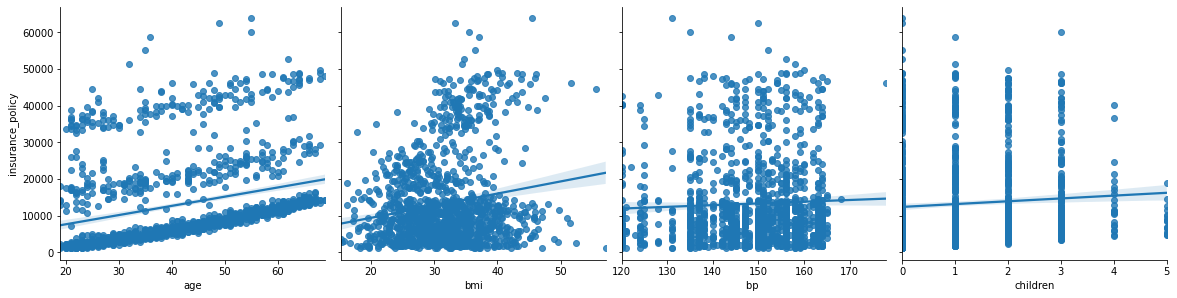

In [8]:
# Visualizing the relationships between numerical features and target variable.

g = sns.PairGrid(df, y_vars=["insurance_policy"], x_vars=X_numeric.columns, height=4)
g.map(sns.regplot)

In [9]:
# printing Pearson correlation coefficients between numerical features and target variable.

predict_insurance_policy = df.corr().insurance_policy
predict_insurance_policy

age                 0.291133
bmi                 0.174308
bp                  0.043479
children            0.077097
insurance_policy    1.000000
Name: insurance_policy, dtype: float64

# Linear Regression

For our next analysis steps, we need to convert our categorical feature variables (gender, region and smoker) in numerical data types and create Dummy Variables.

In [3]:

# Create a new dataframe with dummy variables as preparation for Linear Regression modelling.


df_LR = df
df_LR = pd.get_dummies(df, columns=['gender', 'region', 'smoker'], drop_first=True, dummy_na=False)
X_df_LR = df_LR.drop(columns=['insurance_policy'])
X_df_LR

<IPython.core.display.Javascript object>

,age,bmi,bp,children,gender_M,region_northwest,region_southeast,region_southwest,smoker_smoker
0,23,31.900,157,0,1,0,0,1,1
1,20,36.770,160,1,0,0,1,0,0
2,33,35.000,145,3,0,0,1,0,0
3,37,23.705,153,0,0,1,0,0,0
4,36,27.880,156,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1295,54,30.970,143,3,0,0,0,1,0
1296,22,34.920,156,0,1,0,0,0,0
1297,21,34.850,145,0,1,0,1,0,0
1298,22,24.800,150,0,1,1,0,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

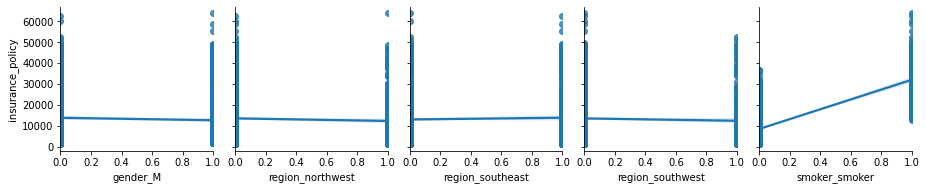

In [11]:
# Visualizing pairplots between dummy variables and target variable.

g = sns.PairGrid(df_LR, y_vars=["insurance_policy"], x_vars=df_LR.columns[5:])
g.map(sns.regplot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

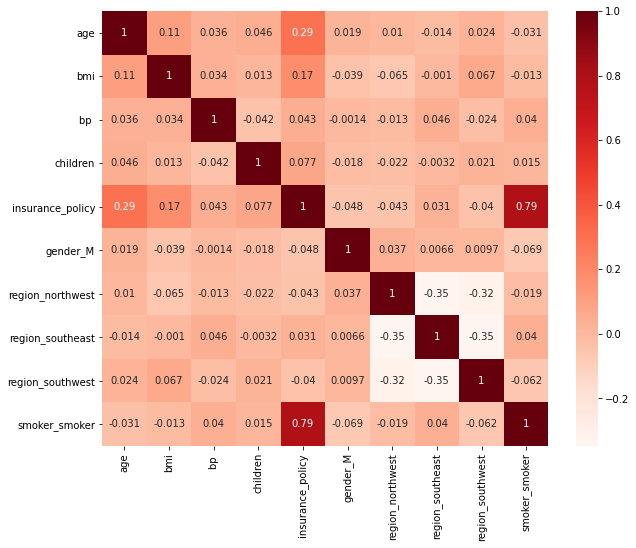

In [12]:
# Again plotting correlation matrix with all features

plt.figure(figsize=(10,8))
sns.heatmap(df_LR.corr(), cmap="Reds", annot=True)

As we can see, there is a high correlation between insurance policy and smoking habit.

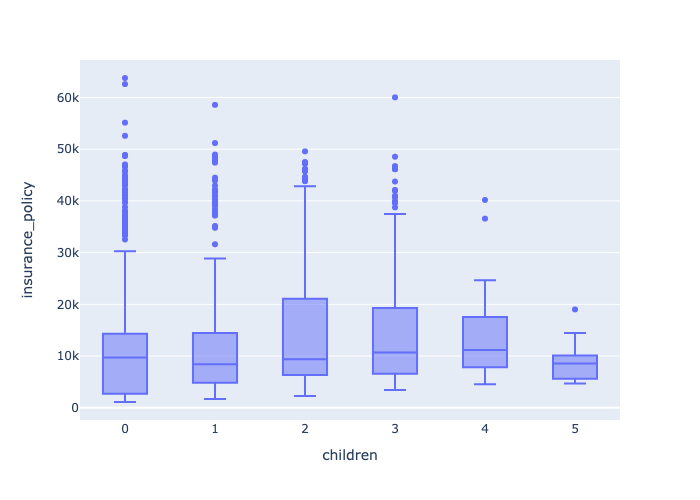

In [4]:
# Visualizing relationship between "children" and target variable.

import plotly.express as px
fig = px.box(df_LR, x='children', y='insurance_policy')
fig.show(renderer="png")

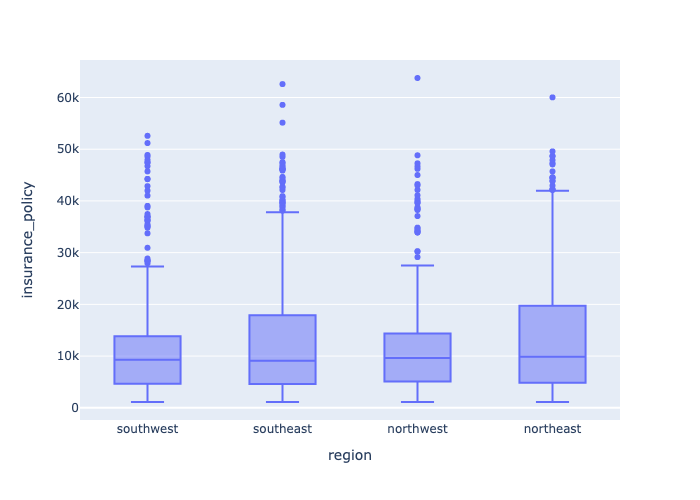

In [4]:
# Visualizing relationship between "region" and target variable.

import plotly.express as px
fig = px.box(df, x='region', y='insurance_policy')
fig.show(renderer="png")

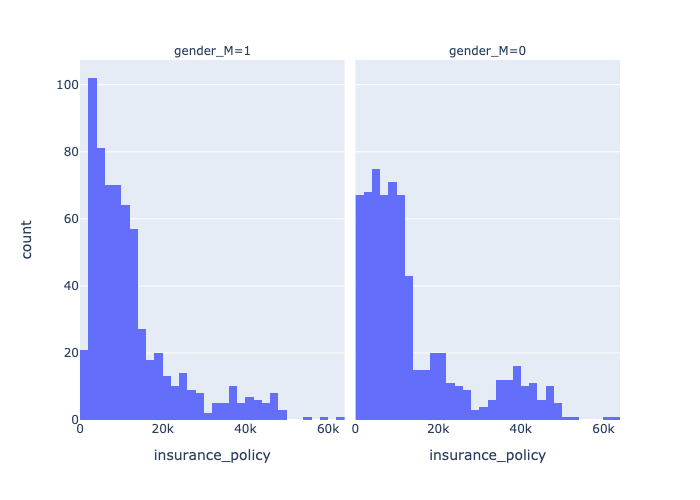

In [5]:
# Vizualising "insurance_policy" related to different genders.

import plotly.express as px
fig = px.histogram(df_LR, x='insurance_policy', facet_col='gender_M')
fig.show(renderer="png")

In [16]:
# difference in target variable mean related to "gender"

df_gender_mean = df.groupby(['gender']).agg(medical_cost_mean=('insurance_policy', 'mean')).reset_index()
df_gender_mean

,gender,medical_cost_mean
0,F,13813.726879
1,M,12660.280775


In [17]:
# difference in target variable mean related to "children"

mean_children = df_LR.groupby(['children']).agg(medical_cost_mean=('insurance_policy', 'mean')).reset_index()
mean_children

,children,medical_cost_mean
0,0,12245.233617
1,1,12588.488896
2,2,15250.369050
3,3,15454.476122
4,4,14240.072724
5,5,8786.035247


In [18]:
# difference in target variable mean related to "region"

mean_region = df.groupby(['region']).agg(medical_cost_mean=('insurance_policy', 'mean')).reset_index()
mean_region

,region,medical_cost_mean
0,northeast,14329.677569
1,northwest,12316.011159
2,southeast,13847.026275
3,southwest,12398.871957


In [19]:
# difference in target variable mean related to "smoker"

mean_smoker = df.groupby(['smoker']).agg(medical_cost_mean=('insurance_policy', 'mean')).reset_index()
mean_smoker

,smoker,medical_cost_mean
0,non-smoker,8445.751624
1,smoker,31980.476103


As we now expected, there is a high difference in insurance policy means of smoker and non-smoker.

In [20]:
# printing correlation statistics (Pearson correlation coefficient, p_values etc.) between target variable,
# numerical features and dummy features

import pingouin as pg
print("Correlation statistics")
print(50*"-")
print()
for i in [i for i in range(10) if i != 4]:
    print(f"{df_LR.columns[i]}:")
    print(pg.corr(df_LR.iloc[:,i], y))
    print()

Correlation statistics
--------------------------------------------------

age:
            n         r         CI95%         p-val       BF10  power
pearson  1300  0.291133  [0.24, 0.34]  8.209525e-27  2.924e+23    1.0

bmi:
            n         r         CI95%         p-val       BF10     power
pearson  1300  0.174308  [0.12, 0.23]  2.496216e-10  1.676e+07  0.999994

bp :
            n         r         CI95%     p-val   BF10     power
pearson  1300  0.043479  [-0.01, 0.1]  0.117136  0.118  0.347512

children:
            n         r         CI95%     p-val   BF10     power
pearson  1300  0.077097  [0.02, 0.13]  0.005415  1.655  0.794774

gender_M:
            n         r         CI95%     p-val   BF10     power
pearson  1300 -0.047835  [-0.1, 0.01]  0.084698  0.153  0.407081

region_northwest:
            n         r         CI95%     p-val   BF10     power
pearson  1300 -0.043493  [-0.1, 0.01]  0.117023  0.119  0.347691

region_southeast:
            n         r          CI95%    

In the above output we see some more detailed statistical information about the linear relationship between insurance policy and the feature variables.  
As expected there is a very high significance of the smoker variable.  
Age, bmi and number of children have also significant p values.  
The rest of the features are not statistically significant related to a 5% p value.

In the next step we will implement and compare some different Linear Regression models. (We will vary our set of feature variables considered in the model.)

In [7]:
# Implementing a Linear Regression model with scikit learn library with all available features considered.

X = df_LR.drop("insurance_policy", axis=1)
y = df_LR.insurance_policy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
comp_df = pd.DataFrame(data={"insurance_policy": y_test.round(0), "predicted": y_pred.round(0)})
comp_df["difference"] = comp_df['insurance_policy'] - comp_df['predicted']
comp_df

<IPython.core.display.Javascript object>

,insurance_policy,predicted,difference
579,23307.0,34966.0,-11659.0
1014,9288.0,9061.0,227.0
759,4720.0,3403.0,1317.0
446,9563.0,14422.0,-4859.0
186,19516.0,29720.0,-10204.0
...,...,...,...
638,12486.0,17721.0,-5235.0
440,1534.0,2938.0,-1404.0
737,10560.0,11720.0,-1160.0
878,21774.0,30253.0,-8479.0


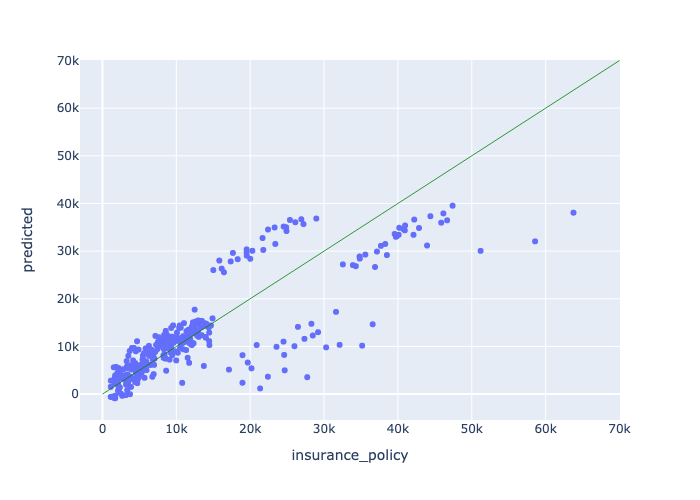

In [8]:
import plotly.express as px
fig = px.scatter(comp_df, x='insurance_policy', y='predicted')
fig.add_shape(type='line', x0=0, x1=70000, y0=0, y1=70000, opacity=0.8,
                    line=dict(color='green', width=1, dash='solid'),
                    xref='x', yref='y', layer='above')
fig.show(renderer="png")

In the above picture we are visualizing the residuals (differences between predicted and real insurance policy) of our Regression model.

In [23]:
print("Linear Regression coefficients")
print(50*"-")
print()
for i in range(len(X_df_LR.columns)):
    print(f"{X_df_LR.columns[i]}:")
    print(model.coef_[i])
    print()

Linear Regression coefficients
--------------------------------------------------

age:
261.7009275296032

bmi:
281.6240941036613

bp :
-2.0523759063160565

children:
454.5159294917127

gender_M:
-113.06763270358068

region_northwest:
-1373.279396975316

region_southeast:
-504.9810031925141

region_southwest:
-777.5039942215581

smoker_smoker:
23901.64353891594



In [9]:
# Making a Linear Regression model only with features we discovered as significant.

X_new = df_LR[['age', 'bmi', 'children', 'gender_M', "smoker_smoker"]]
y = df_LR.insurance_policy
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_train, y_test = train_test_split(X_new,y, test_size=0.25, random_state=0)
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression().fit(X_1_train, y_train)
y_pred_1 = model_1.predict(X_1_test)
comp_df_1 = pd.DataFrame(data={"insurance_policy": y_test.round(0), "predicted": y_pred_1.round(0)})
comp_df_1["difference"] = comp_df_1['insurance_policy'] - comp_df_1['predicted']
comp_df_1

<IPython.core.display.Javascript object>

,insurance_policy,predicted,difference
579,23307.0,34261.0,-10954.0
1014,9288.0,9123.0,165.0
759,4720.0,3196.0,1524.0
446,9563.0,13800.0,-4237.0
186,19516.0,29605.0,-10089.0
...,...,...,...
638,12486.0,17058.0,-4572.0
440,1534.0,3705.0,-2171.0
737,10560.0,11832.0,-1272.0
878,21774.0,30346.0,-8572.0


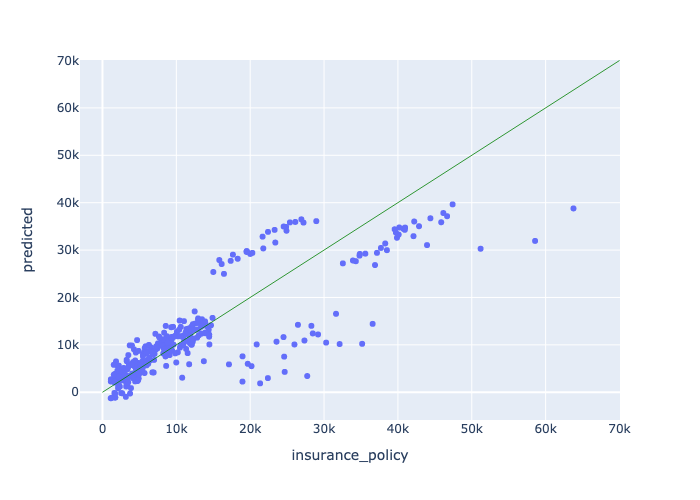

In [10]:
import plotly.express as px
fig = px.scatter(comp_df_1, x='insurance_policy', y='predicted')
fig.add_shape(type='line', x0=0, x1=70000, y0=0, y1=70000, opacity=0.8,
                    line=dict(color='green', width=1, dash='solid'),
                    xref='x', yref='y', layer='above')
fig.show(renderer="png")

In [26]:
print("Linear Regression coefficients")
print(50*"-")
print()
for i in range(len(X_new.columns)):
    print(f"{X_new.columns[i]}:")
    print(model_1.coef_[i])
    print()

Linear Regression coefficients
--------------------------------------------------

age:
259.31776247476813

bmi:
286.13448414976335

children:
451.5191448730374

gender_M:
-159.87185239836245

smoker_smoker:
23947.513708640625



In [11]:
# At last, we are constructing a model only with the most significant feature we have detected before:

X_2 = df_LR[["smoker_smoker"]]
y = df_LR.insurance_policy
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_train, y_test = train_test_split(X_2,y, test_size=0.25, random_state=0)
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression().fit(X_2_train, y_train)
y_pred_2 = model_2.predict(X_2_test)
comp_df_2 = pd.DataFrame(data={"insurance_policy": y_test.round(0), "predicted": y_pred_2.round(0)})
comp_df_2["difference"] = comp_df_2['insurance_policy'] - comp_df_2['predicted']
comp_df_2

<IPython.core.display.Javascript object>

,insurance_policy,predicted,difference
579,23307.0,31799.0,-8492.0
1014,9288.0,8312.0,976.0
759,4720.0,8312.0,-3592.0
446,9563.0,8312.0,1251.0
186,19516.0,31799.0,-12283.0
...,...,...,...
638,12486.0,8312.0,4174.0
440,1534.0,8312.0,-6778.0
737,10560.0,8312.0,2248.0
878,21774.0,31799.0,-10025.0


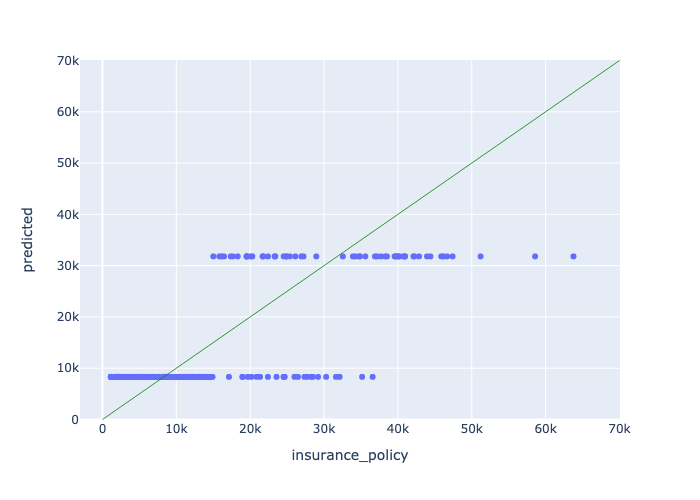

In [12]:
import plotly.express as px
fig = px.scatter(comp_df_2, x='insurance_policy', y='predicted')
fig.add_shape(type='line', x0=0, x1=70000, y0=0, y1=70000, opacity=0.8,
                    line=dict(color='green', width=1, dash='solid'),
                    xref='x', yref='y', layer='above')
fig.show(renderer="png")

In [29]:
print("Linear Regression coefficients")
print(50*"-")
print()
for i in range(len(X_2.columns)):
    print(f"{X_2.columns[i]}:")
    print(model_2.coef_[i])
    print()

Linear Regression coefficients
--------------------------------------------------

smoker_smoker:
23486.47665847309



In [30]:
# Printing some metrics about the precision of our Regression model

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
scores = {"r2_score": r2_score, "mean_absolute_error": mean_absolute_error, 
          "mean_squared_error": mean_squared_error, 
          "mean_absolute_percentage_error": mean_absolute_percentage_error}
for score in scores:
    print(f"{score}: ", scores.get(score)(y_test, y_pred))
    print(f"{score}: ", scores.get(score)(y_train, model.predict(X_train)))

r2_score:  0.6855423805766782
r2_score:  0.7621523572654476
mean_absolute_error:  4284.998084607063
mean_absolute_error:  4108.157524534028
mean_squared_error:  44075117.118416056
mean_squared_error:  34969261.45581295
mean_absolute_percentage_error:  0.4017991213777978
mean_absolute_percentage_error:  0.4150078332185446


In [31]:
# Printing some metrics about the precision of our second Regression model

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
scores = {"r2_score": r2_score, "mean_absolute_error": mean_absolute_error, 
          "mean_squared_error": mean_squared_error, 
          "mean_absolute_percentage_error": mean_absolute_percentage_error}
for score in scores:
    print(f"{score}: ", scores.get(score)(y_test, y_pred_1))
    print(f"{score}: ", scores.get(score)(y_train, model_1.predict(X_1_train)))

r2_score:  0.6873901023510967
r2_score:  0.7605448087952764
mean_absolute_error:  4257.824777857869
mean_absolute_error:  4101.459939760095
mean_squared_error:  43816136.10291676
mean_squared_error:  35205609.32165682
mean_absolute_percentage_error:  0.409797485015895
mean_absolute_percentage_error:  0.4091503828927917


In [32]:
# Printing some metrics about the precision of our third Regression model

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
scores = {"r2_score": r2_score, "mean_absolute_error": mean_absolute_error, 
          "mean_squared_error": mean_squared_error, 
          "mean_absolute_percentage_error": mean_absolute_percentage_error}
for score in scores:
    print(f"{score}: ", scores.get(score)(y_test, y_pred_2))
    print(f"{score}: ", scores.get(score)(y_train, model_2.predict(X_2_train)))

r2_score:  0.5754884818848911
r2_score:  0.6318499522688106
mean_absolute_error:  5657.928973896874
mean_absolute_error:  5625.297867765935
mean_squared_error:  59500529.55737782
mean_squared_error:  54126814.65357137
mean_absolute_percentage_error:  0.8517885776107837
mean_absolute_percentage_error:  0.8392736893078109


# Conclusion
We see that our second model (with only considering significant features) has a slighty higher R2 score for the test dataset than our first model. For that reason, we conclude that we probably don't need to consider all of our feature variables (like in our first model) for our model.
In the third model we considered only the yes/no smoker feature and get a significantly lower R2 score.

# Tree Regression

Now we want to try to gain further insights in our data with the help of a Decision Tree model. 

In [35]:
cat_feature_list = ["gender", "children", "region", "smoker"] 

print("ANOVA importance")
print(50*"-")
print()
for i in range(4):
    print(f"{cat_feature_list[i]}: ")
    print(df.anova(dv="insurance_policy", between= cat_feature_list[i]))
    print()

ANOVA importance
--------------------------------------------------

gender: 
   Source  ddof1  ddof2         F     p-unc       np2
0  gender      1   1298  2.976917  0.084698  0.002288

children: 
     Source  ddof1  ddof2         F     p-unc      np2
0  children      5   1294  3.853248  0.001805  0.01467

region: 
   Source  ddof1  ddof2         F     p-unc       np2
0  region      3   1296  2.289981  0.076685  0.005273

smoker: 
   Source  ddof1  ddof2            F          p-unc       np2
0  smoker      1   1298  2104.243606  7.061135e-274  0.618487



In [13]:
# Implementing a Decision Tree model with the help of scikit learn library.

X = df_LR.drop("insurance_policy", axis=1)
y = df_LR.insurance_policy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
y_pred = model.predict(X_test)
comp_df = pd.DataFrame(data={"insurance_policy": y_test.round(0), "predicted": y_pred.round(0)})
comp_df["difference"] = comp_df['insurance_policy'] - comp_df['predicted']
comp_df

<IPython.core.display.Javascript object>

,insurance_policy,predicted,difference
579,23307.0,20781.0,2526.0
1014,9288.0,9827.0,-539.0
759,4720.0,4207.0,513.0
446,9563.0,9827.0,-264.0
186,19516.0,20781.0,-1265.0
...,...,...,...
638,12486.0,13287.0,-801.0
440,1534.0,4207.0,-2673.0
737,10560.0,9827.0,733.0
878,21774.0,20781.0,993.0


In [42]:
# Printing metrics of our model.

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
scores = {"r2_score": r2_score, "mean_absolute_error": mean_absolute_error, 
          "mean_squared_error": mean_squared_error,
          "mean_absolute_percentage_error": mean_absolute_percentage_error}
for score in scores:
    print(f"{score}: ", scores.get(score)(y_test, y_pred))
    print(f"{score}: ", scores.get(score)(y_train, model.predict(X_train)))

r2_score:  0.7682315491768352
r2_score:  0.8376705327283945
mean_absolute_error:  3164.4695158891323
mean_absolute_error:  2949.341957583974
mean_squared_error:  32485209.399976864
mean_squared_error:  23866293.219222076
mean_absolute_percentage_error:  0.3540807084224045
mean_absolute_percentage_error:  0.3574165405551797


Comparing the metrics with our Regression model constructed above, our tree models predictions are obviously better.

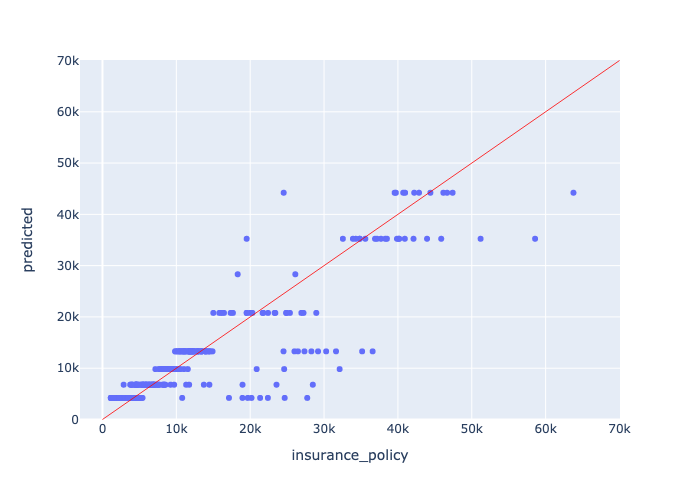

In [14]:
import plotly.express as px
fig = px.scatter(comp_df, x='insurance_policy', y='predicted')
fig.add_shape(type='line', x0=0, x1=70000, y0=0, y1=70000, opacity=0.8,
                    line=dict(color='red', width=1, dash='solid'),
                    xref='x', yref='y', layer='above')
fig.show(renderer="png")

Visualization of the residuals (differences between predicted and real insurance policies) of our Tree model.

In contrast to the Linear Regression models we see the typically behaviour of Tree models to predict the same target values for all X values in the same last tree leaf.  
Because we generated a tree model with depth of 3, we have 8 different output values.

In [59]:
print("Tree Regression feature importance")
print(50*"-")
print()
for i in range(len(X_df_LR.columns)):
    print(f"{X_df_LR.columns[i]}:")
    print(f"{model.feature_importances_[i].round(3)}"," = " "{:.3%}".format(model.feature_importances_[i]))
    print()

Tree Regression feature importance
--------------------------------------------------

age:
0.103  = 10.295%

bmi:
0.143  = 14.276%

bp :
0.0  = 0.000%

children:
0.0  = 0.000%

gender_M:
0.0  = 0.000%

region_northwest:
0.0  = 0.000%

region_southeast:
0.0  = 0.000%

region_southwest:
0.0  = 0.000%

smoker_smoker:
0.754  = 75.429%



As we can see our tree model consideres only three features. 
Clearly the most important feature is the smoking question, bmi and age are clearly less important for the prediction.

In [49]:
model.tree_

In [51]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

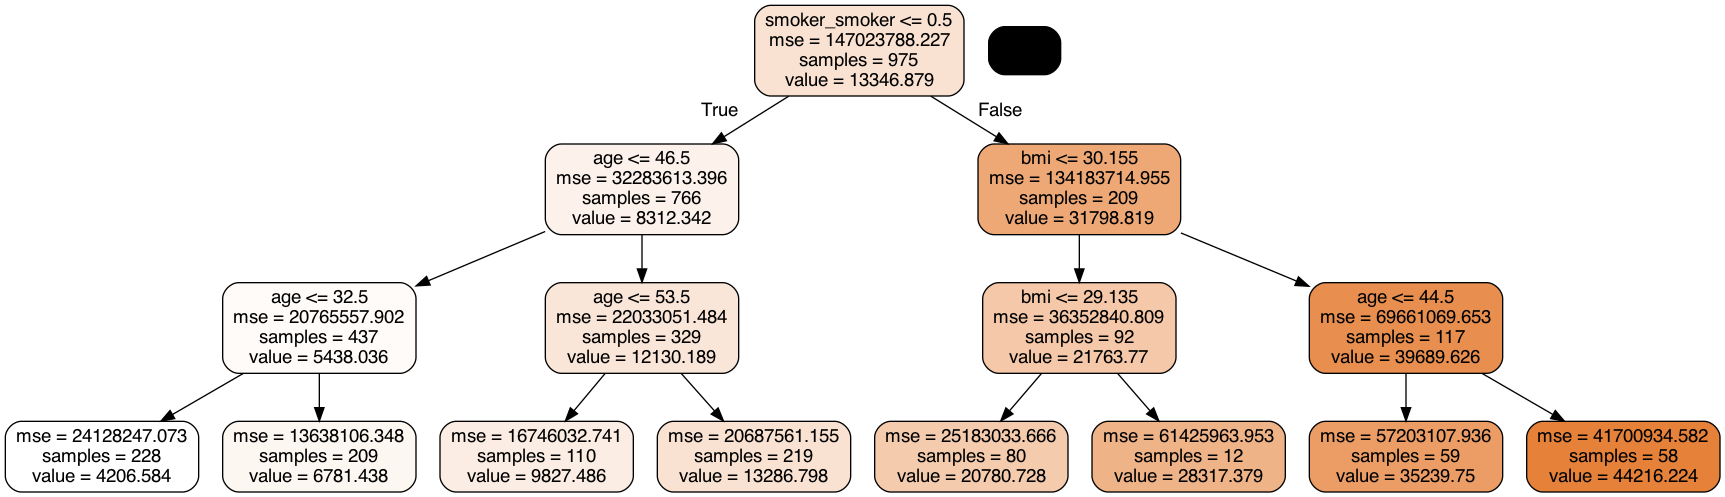

In [52]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In the above picture we see the structure of our constructed tree model and which decisions it takes on each node.  
The most important question is wheather the patient is smoker or not. Depending on the answer of this the second most important question is related to the age of the patient (for non smokers) or to its bmi (smokers).

For non smokers the age of 46.5 seems to be a critical value for predicting its insurance policy.  
For smokers a bmi above 30 seems to be critical.

In the next step we try to visualize this.

In [15]:
# Creating bin columns of the feature bmi/age.

df['age_bins'] = pd.cut(df['age'], bins=10)
df = df[['age'] + ['age_bins'] + ['gender', 'bmi', 'bp ', 'children', 'region', 'smoker', 'insurance_policy']]
df['bmi_bins'] = pd.cut(df['bmi'], bins=6)
old_columns = [x for x in df.columns if x not in ['bmi_bins']]
insert_index = old_columns.index('bmi') + 1
df = df[old_columns[:insert_index] + ['bmi_bins'] + old_columns[insert_index:]]
df_groupby = df.groupby(['smoker', 'age_bins']).agg(insurance_policy_mean=('insurance_policy', 'mean'), insurance_policy_median=('insurance_policy', 'median')).reset_index()
df_groupby['insurance_policy_median'] = df_groupby['insurance_policy_median'].round(1)
df_groupby
df


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,age,age_bins,gender,bmi,bmi_bins,bp,children,region,smoker,insurance_policy
0,23,"(18.95, 24.0]",M,31.900,"(29.237, 36.21]",157,0,southwest,smoker,16884.92400
1,20,"(18.95, 24.0]",F,36.770,"(36.21, 43.183]",160,1,southeast,non-smoker,1725.55230
2,33,"(29.0, 34.0]",F,35.000,"(29.237, 36.21]",145,3,southeast,non-smoker,4449.46200
3,37,"(34.0, 39.0]",F,23.705,"(22.263, 29.237]",153,0,northwest,non-smoker,21984.47061
4,36,"(34.0, 39.0]",F,27.880,"(22.263, 29.237]",156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1295,54,"(49.0, 54.0]",F,30.970,"(29.237, 36.21]",143,3,southwest,non-smoker,10600.54830
1296,22,"(18.95, 24.0]",M,34.920,"(29.237, 36.21]",156,0,northeast,non-smoker,2205.98080
1297,21,"(18.95, 24.0]",M,34.850,"(29.237, 36.21]",145,0,southeast,non-smoker,1629.83350
1298,22,"(18.95, 24.0]",M,24.800,"(22.263, 29.237]",150,0,northwest,non-smoker,2007.94500


In [16]:
df_groupby_non_smoker = df_groupby.loc[df_groupby['smoker'].isin(['non-smoker'])]
df_groupby_non_smoker

,smoker,age_bins,insurance_policy_mean,insurance_policy_median
0,non-smoker,"(18.95, 24.0]",3675.555383,1917.3
1,non-smoker,"(24.0, 29.0]",4724.774468,3062.5
2,non-smoker,"(29.0, 34.0]",5648.117542,4433.7
3,non-smoker,"(34.0, 39.0]",6257.039585,5263.9
4,non-smoker,"(39.0, 44.0]",7295.788665,6593.5
5,non-smoker,"(44.0, 49.0]",9145.945589,8044.7
6,non-smoker,"(49.0, 54.0]",11054.108929,9556.3
7,non-smoker,"(54.0, 59.0]",12581.723167,11248.9
8,non-smoker,"(59.0, 64.0]",13917.357736,12622.2
9,non-smoker,"(64.0, 69.0]",14924.019376,13981.9


In [17]:
df_groupby_smoker = df_groupby.loc[df_groupby['smoker'].isin(['smoker'])]
df_groupby_smoker

,smoker,age_bins,insurance_policy_mean,insurance_policy_median
10,smoker,"(18.95, 24.0]",26285.427884,29337.0
11,smoker,"(24.0, 29.0]",30355.896634,34838.9
12,smoker,"(29.0, 34.0]",24941.512858,19074.3
13,smoker,"(34.0, 39.0]",31453.062139,37079.4
14,smoker,"(39.0, 44.0]",29628.931863,22303.0
15,smoker,"(44.0, 49.0]",34974.864676,39597.4
16,smoker,"(49.0, 54.0]",34044.585636,32518.6
17,smoker,"(54.0, 59.0]",38336.412252,42151.6
18,smoker,"(59.0, 64.0]",41755.858278,46130.5
19,smoker,"(64.0, 69.0]",37434.875538,29523.2


In [18]:
df_groupby['age_bins'] = df_groupby['age_bins'].astype('string')
df_groupby

,smoker,age_bins,insurance_policy_mean,insurance_policy_median
0,non-smoker,"(18.95, 24.0]",3675.555383,1917.3
1,non-smoker,"(24.0, 29.0]",4724.774468,3062.5
2,non-smoker,"(29.0, 34.0]",5648.117542,4433.7
3,non-smoker,"(34.0, 39.0]",6257.039585,5263.9
4,non-smoker,"(39.0, 44.0]",7295.788665,6593.5
5,non-smoker,"(44.0, 49.0]",9145.945589,8044.7
6,non-smoker,"(49.0, 54.0]",11054.108929,9556.3
7,non-smoker,"(54.0, 59.0]",12581.723167,11248.9
8,non-smoker,"(59.0, 64.0]",13917.357736,12622.2
9,non-smoker,"(64.0, 69.0]",14924.019376,13981.9


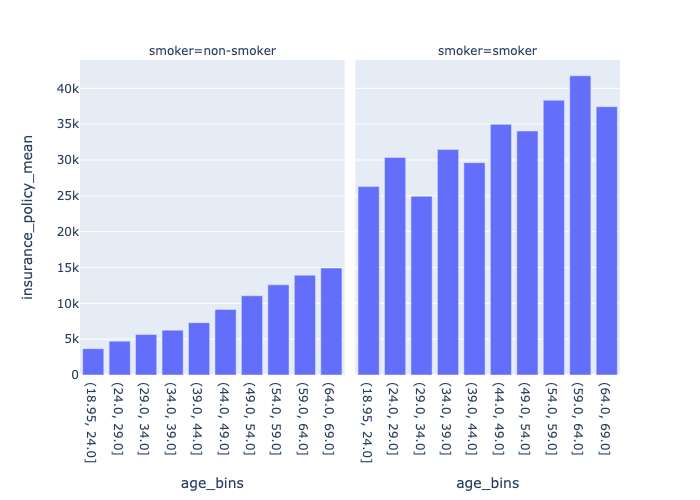

In [19]:
import plotly.express as px
fig = px.bar(df_groupby, x='age_bins', y='insurance_policy_mean', facet_col='smoker')
fig.show(renderer="png")

It is noticeable that the insurance policy means of the non smokers are (much) lower than of the smokers for every age group.  
Furthermore insurance policy for non smokers rises quite uniformly above the different age groups, whereas the distribution of insurance policy means is far more volatile for the smokers.  
It would be interesting to investigate further the reasoning for this.

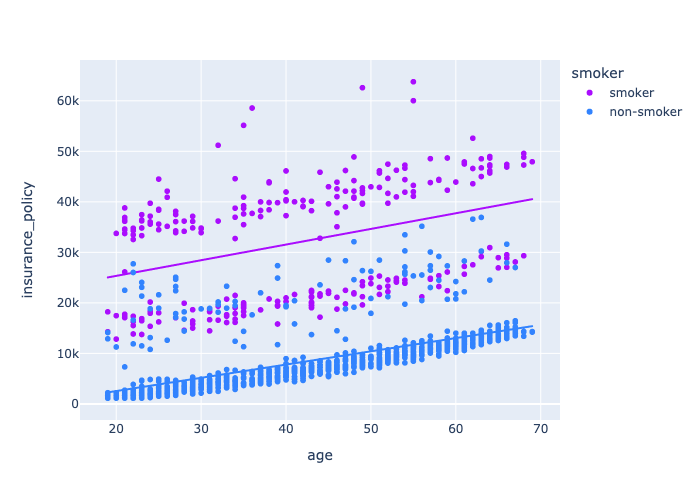

In [20]:
import plotly.express as px
fig = px.scatter(df, x='age', y='insurance_policy', color='smoker', trendline='ols', color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show(renderer="png")

In [21]:
df['age_bins'] = df['age_bins'].astype('string')
df['bmi_bins'] = df['bmi_bins'].astype('string')
df_groupby_bmi = df.groupby(['smoker', 'bmi_bins']).agg(insurance_policy_mean=('insurance_policy', 'mean'), insurance_policy_median=('insurance_policy', 'median')).reset_index()
df_groupby_bmi

,smoker,bmi_bins,insurance_policy_mean,insurance_policy_median
0,non-smoker,"(15.248, 22.263]",6431.214631,5116.500400
1,non-smoker,"(22.263, 29.237]",8331.819105,7201.700850
2,non-smoker,"(29.237, 36.21]",8653.433042,7630.356800
3,non-smoker,"(36.21, 43.183]",8837.425038,7650.773750
4,non-smoker,"(43.183, 50.157]",8931.564482,9281.520300
5,non-smoker,"(50.157, 57.13]",5279.590750,5260.987500
6,smoker,"(15.248, 22.263]",19507.237069,16977.913025
7,smoker,"(22.263, 29.237]",21416.244756,20521.426275
8,smoker,"(29.237, 36.21]",35910.849851,36924.494890
9,smoker,"(36.21, 43.183]",43588.219668,42983.458500


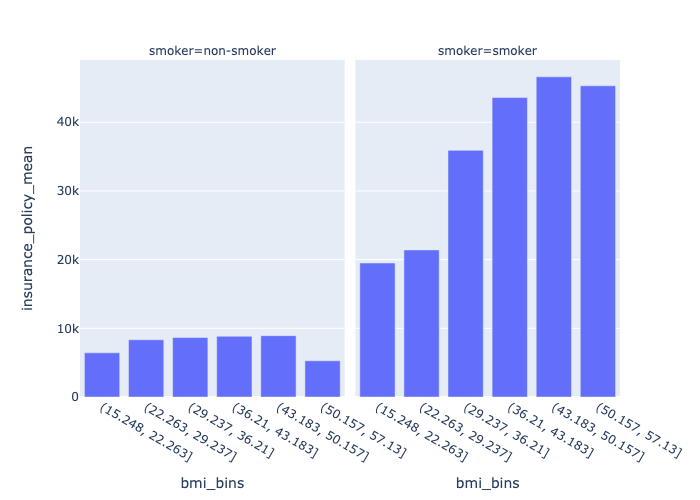

In [22]:
import plotly.express as px
fig = px.bar(df_groupby_bmi, x='bmi_bins', y='insurance_policy_mean', facet_col='smoker')
fig.show(renderer="png")

Inspecting the above diagram we can understand why in our decision tree model the bmi was not chosen as a relevant factor to predict insurance policy for non smokers. In fact the insurance policy means are very similar in the bmi groups between 22 and 50.

In contrary in the smoker bar chart we see a great jump of insurance policy mean above a bmi of 29. 

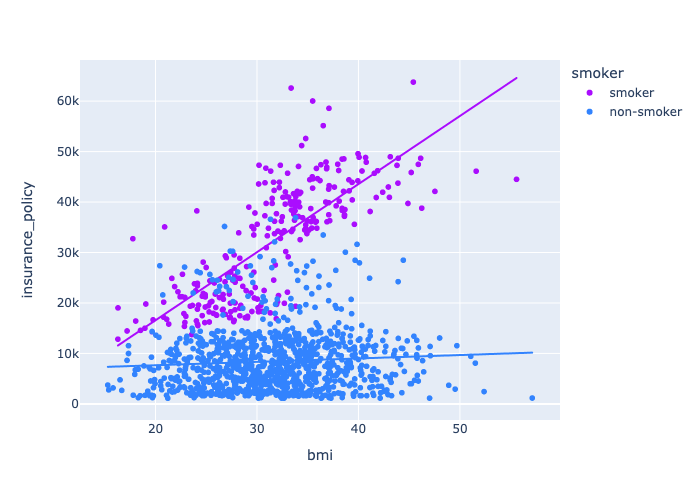

In [23]:
import plotly.express as px
fig = px.scatter(df, x='bmi', y='insurance_policy', color='smoker', trendline='ols', color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show(renderer="png")

Also in this scatterplot we see that insurance policies for non-smoker only slightly increases with higher bmi in contrary to policies for smokers.

In [24]:
cont_table = pd.crosstab(df["smoker"], df["gender"])
cont_table = cont_table.reset_index()
cont_table

<IPython.core.display.Javascript object>

gender,smoker,F,M
0,non-smoker,505,530
1,smoker,152,113


Distribution between smoker and non-smoker depending on gender.